---



# My Logistic Regression

---


## 1. The dataset 
---



### 1.1 The data: "Probability of passing an exam versus hours of study"

---

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

X = np.asarray([[0.50], [0.75], [1.00], [1.25], [1.50], [1.75], [3.00],
                 [4.75], [1.75], [3.25], [5.00], [2.00], [2.25], [2.50],
                 [2.75], [3.50], [4.00], [4.25], [4.50], [5.50]])

y = np.asarray([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,0,1,0,1,1,1,1,1,1])

print("X = ", [x[0] for x in X])
print("y = ", y)

X =  [0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 3.0, 4.75, 1.75, 3.25, 5.0, 2.0, 2.25, 2.5, 2.75, 3.5, 4.0, 4.25, 4.5, 5.5]
y =  [0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1]


### <span style="color:rgb(0, 100, 200)"> 1.2 Visualizing the Data </span>
---


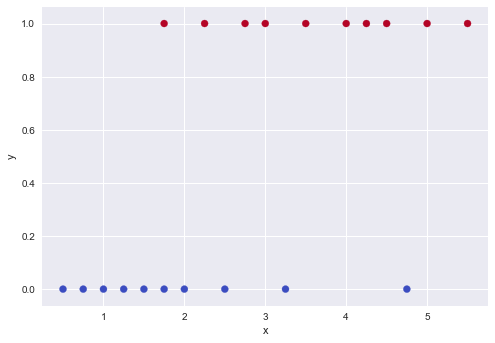

In [2]:
# Code to plot the data points in a Scatterplot
plt.style.use('seaborn')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X, y, c=y, cmap=plt.cm.coolwarm)
plt.show()


## 2. Logistic Regression

---

### 2.1 Sigmoid Function
---

Sigmoid Activation Function
> $ g(z) =  \large \frac{1}{1+e^{-z}}$


In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


### <span style="color:rgb(0, 100, 200)"> 2.1.1 Visualizing the Sigmoid Function </span>

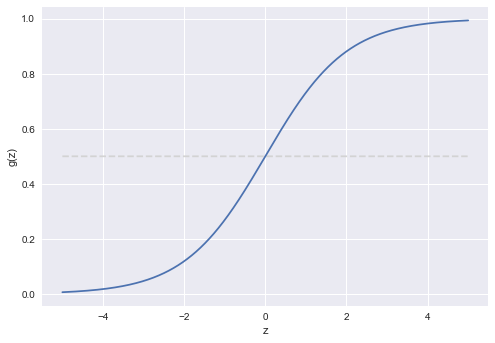

In [4]:
# Code to plot a Sigmoid Function of x in range(-5, 5); 

x_sigmoid = np.arange(-5, 5, 0.001)
y_sigmoid = (sigmoid(x_sigmoid))

plt.grid(True)
plt.xlabel('z')
plt.ylabel('g(z)')

plt.plot(x_sigmoid, x_sigmoid*0+0.5, linestyle='--', c='lightgray')
plt.plot(x_sigmoid, y_sigmoid)
plt.show()

### 2.2 Hypothesis Function
---

The Logistic Regression Hypothesis $h_\theta(x)$ is calculated as

> $h_\theta(x)=g(\theta^Tx) =\large \frac{1}{1+e^{-\theta^Tx}}$


$h_\theta(x)$ is a value in range $[0, 1]$ and it represents the estimated probability that $y=1$ given $X$, parametherized by $\theta$ :
> $h_\theta(x)=P(y=1|x;\theta) $



In [5]:
def predict_hypothesis(x, theta, bias):
    # Returns the probability after passing through the sigmoid function
    return sigmoid(np.dot(x, np.transpose(theta)) + bias)

### 2.2 Calculating the Loss
---

The Loss $J(\theta)$ can be calculated as

> $
    J(\theta) =
        \frac{1}{m} \sum^m_{i = 1} Cost(h_\theta (x^{(i)}), y^{(i)}) $, 
>
>where:
>
> $
  Cost(h_\theta (x), y) =
    \begin{cases}
      - \log(h_\theta (x))     & \text{if y = 1}  \\
      - \log(1 - h_\theta (x)) & \text{if y = 0}
    \end{cases}       
$


This Cost function can be written as one equation to use in our gradient descent loss function:

> $ Cost(h_\theta(x), y)= -y\cdot\log(h_\theta (x)) - (1-y)\cdot\log (1-h_\theta (x))$

In [6]:
def cost(hx, y):
    # Calculate the cost according to the formula explained above
    return - y * np.log(hx) - (1-y) * np.log(1-hx)

def compute_loss(hx, y):
    # Calculate the loss as the mean of the costs for each data point
    return np.mean(cost(hx, y))

### <span style="color:rgb(0, 100, 200)"> 2.2.1 Visualizing the Cost Function</span>

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


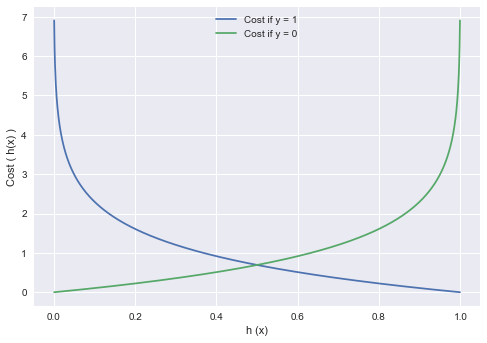

In [7]:
# Code to visualize the cost function when y = 1 (in blue) and when when y = 0 (in green)
x_cost = np.arange(0, 1, 0.001)

y_cost1 = (cost(x_cost, 1))
y_cost0 = (cost(x_cost, 0))

plt.grid(True)
plt.xlabel('h (x)')
plt.ylabel('Cost ( h(x) )')
plt.plot(x_cost, y_cost1, label='Cost if y = 1')
plt.plot(x_cost, y_cost0, label='Cost if y = 0')
plt.legend()
plt.show()

### 2.3 Batch Gradient Descent
---


Gradient Descent Update Rule: 
>while not converged:
>
> $
\theta^{new}_j =\;\;\; \theta_j - \alpha \frac{\delta}{\delta\theta_j} J(\theta)
\;=\;\;\;\;
\theta_j - \alpha\frac{1}{m} \sum^m_{i=1} \;(h_\theta (x^{(i)})-y^{(i)})x_j^{(i)} \; \;\;\;\; \text{for} \;j = 0, 1,..., n $


In [8]:
def update(theta, bias, a, hx, y):
    '''
    Update rule for the Batch Gradient Descent;
    It updates the coefficient theta and the bias as indicated from the formula above.
    (the bias corresponds to theta_0)
    '''

    m = len(y)
    dh = hx - y
    
    theta = theta - a * 1/m * np.sum(np.dot(np.transpose(X), dh))
    bias = bias - a * np.sum(dh)

    return theta, bias
    

### 2.4 Monitoring the Loss values for Early Stopping
---

Function to monitor the loss; it returns `False` when the algorithm has converged, `True` otherwise (useful in order to stop the training when the loss is not improving anymore).

In [9]:
def monitor_loss(history, patience=2):
    
    if len(history) < patience:
        return True
    else:
        return (history[-1] / history[-patience]) < 0.99999

## 3. Training the Logistic Regression Model
---



### 3.1 Defining the parameters
> * `theta` (theta | weights)
> * `b` (theta 0 | bias | intercept)
> * `lr` (learning rate | alpha)

In [10]:
theta = np.zeros((X.shape[1]))
b = np.zeros((1))
lr = 0.3

print(theta.shape, b.shape)

(1,) (1,)


### 3.2 Training
---

In [11]:
history = []  # list to store the loss values

while(monitor_loss(history)):  # while the algorithm has not converged . . .

    hx = predict_hypothesis(X, theta, b)    # get the hypotesis
    loss = compute_loss(hx, y)              # calculate the loss
    history.append(loss)                    # save current loss
    theta, b = update(theta, b, lr, hx, y)  # update theta 0 and theta 1

## 4. Results
---

### 4.1 Plotting the Loss
---

Minimum loss:  0.4963745839891378


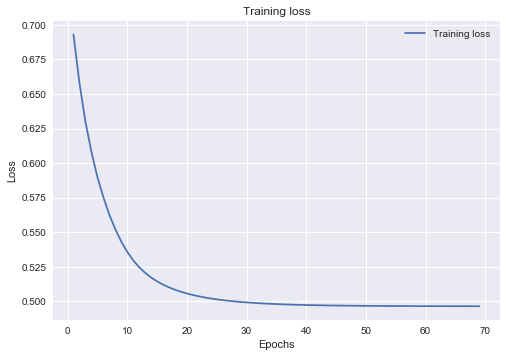

In [12]:
def plot_loss(train_loss):
    
    eps = range(1, len(train_loss) + 1)

    plt.plot(eps, train_loss, label = 'Training loss')
    plt.title("Training loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    
print("Minimum loss: ", min(history))
plot_loss(history)

### 4.2 Best Parameters found during the Training
---

In [13]:
# Printing the best parameters theta, 

print("    Coefficient:  {},\n      Intercept:  {},\n  Learning Rate:  {}".format(theta[0], b[0], lr))

    Coefficient:  1.047597468588169,
      Intercept:  -2.867993272857232,
  Learning Rate:  0.3


### 4.3 Predicting the Results
---

In [14]:
def predict(X, theta, b, decision_boundary=0.5):
    predictions = []
    probabilities = predict_hypothesis(X, theta, b)
    
    for p in probabilities:
        if p >= decision_boundary:
            predictions.append(1)
        elif p < decision_boundary:
            predictions.append(0)
        else:
            predictions.append(None)
            
    return predictions

def my_accuracy(y, p):
    return len(np.where(y == p)[0]) / len(y)
    

predictions = predict(X, theta, b)
accuracy = my_accuracy(y, predictions)
print("      Labels: ", y)
print(" Predictions: ", np.asarray(predictions))
print("    Accuracy: ", accuracy*100, "%")

      Labels:  [0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1]
 Predictions:  [0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1]
    Accuracy:  80.0 %


###  <span style="color:rgb(0, 139, 180)">4.4 Visualizing the obtained Sigmoid on the data</span>

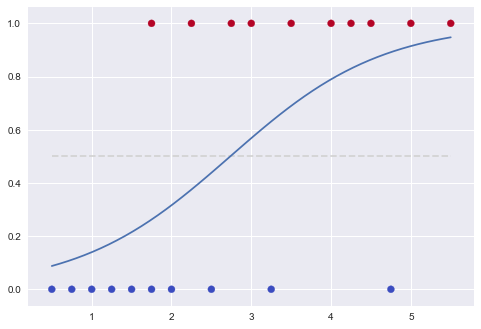

In [15]:
# The following plot shows the data points,
# the Sigmoid function of the best parameters found during training,
# and the Decision Boundary line that decides the predicted value
# (0 if the probability is below the line - smaller than 0.5, 1 otherwise)

range_min = min(X)
range_max = max(X)

x_sigmoid = np.linspace(range_min, range_max)
y_sigmoid = (sigmoid( theta * x_sigmoid + b ))

x_line = np.linspace(range_min, range_max)
y_line = np.linspace(0.5, 0.5)

plt.grid(True)
plt.plot(x_line, y_line, linestyle='--', c='lightgray')
plt.plot(x_sigmoid, y_sigmoid)
plt.scatter(X, y, c=y, cmap=plt.cm.coolwarm)
plt.show()



# 5. Questions
----

### 5.1 Question 1

>After how many iterations, and for which learning rate (α) did your algorithm converge?   
>Plot the loss function with respect to iterations to illustrate this point.




In [16]:
lrates = [0.03, 0.05, 0.08, 0.1, 0.3]
history = []  # list to store the loss values

for i, lr in enumerate(lrates):
    history.append([])
    theta = np.zeros((X.shape[1]))
    b = np.zeros((1))
    
    while(monitor_loss(history[i])):  # while the algorithm has not converged . . .

        hx = predict_hypothesis(X, theta, b)    # get the hypotesis
        loss = compute_loss(hx, y)              # calculate the loss
        history[i].append(loss)                    # save current loss
        theta, b = update(theta, b, lr, hx, y)  # update theta 0 and theta 1


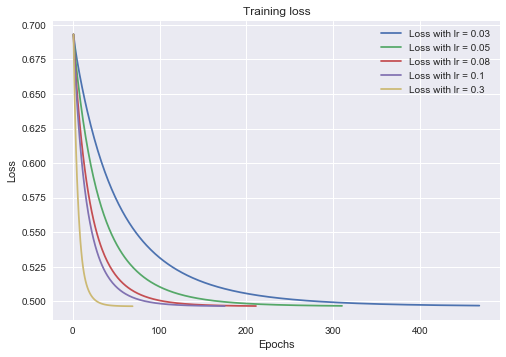

In [17]:
def plot_multiple_losses(loss_history, lrates):
    plt.title("Training loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    
    for i in range(len(loss_history)):
        eps = range(1, len(loss_history[i]) + 1)
        plt.plot(eps, loss_history[i], label='Loss with lr = '+str(lrates[i]))
        
    plt.legend()
    plt.grid(True)
    plt.show()

plot_multiple_losses(history, lrates)

In [18]:
for i in range(len(history)):
    print("Learning Rate: {:5}   |  Minimum Loss: {:10f}   |  Convergence at epoch: {:5}".format(lrates[i],
                                                                              np.min(history[i]),
                                                                              np.argmin(history[i])))

Learning Rate:  0.03   |  Minimum Loss:   0.496806   |  Convergence at epoch:   467
Learning Rate:  0.05   |  Minimum Loss:   0.496617   |  Convergence at epoch:   309
Learning Rate:  0.08   |  Minimum Loss:   0.496508   |  Convergence at epoch:   210
Learning Rate:   0.1   |  Minimum Loss:   0.496473   |  Convergence at epoch:   174
Learning Rate:   0.3   |  Minimum Loss:   0.496375   |  Convergence at epoch:    68


### 5.2 Question 2

>What happens if α is too large? How does this affect the loss function?  
>Plot the loss function with respect to iterations to illustrate this point.




In [19]:
lrates = [0.3, 0.5, 0.8, 1, 1.3, 2]
history = []  # list to store the loss values

for i, lr in enumerate(lrates):
    history.append([])
    theta = np.zeros((X.shape[1]))
    b = np.zeros((1))
    
    for _ in range(100):  # while the algorithm has not converged . . .

        hx = predict_hypothesis(X, theta, b)    # get the hypotesis
        loss = compute_loss(hx, y)              # calculate the loss
        history[i].append(loss)                    # save current loss
        theta, b = update(theta, b, lr, hx, y)  # update theta 0 and theta 1


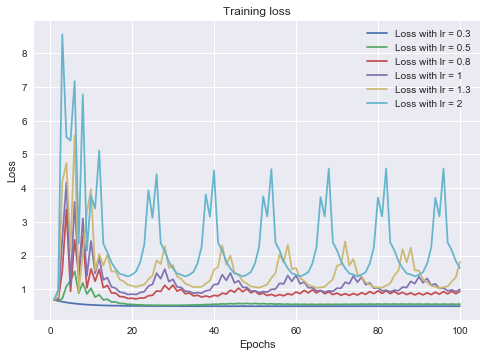

In [20]:
plot_multiple_losses(history, lrates)

### 5.2 Question 3

>Assume that you are applying logistic regression to the iris (flower) dataset, as in the previous assignment.
>Answer the following questions:
>- How would your hypothesis function change in this case and why?
>- How would you utilize your implementation of logistic regression in order to perform (multi-class) classification on the iris dataset? Include some pseudocode while discussing your approach.


In [ ]:
lr = 0.001
classes = np.unique(y)  # array of the unique classes in the labels
history = []  # list to store the loss values
classifiers = []  # list to store the parameters of the classifiers for each class.

for i in range(len(classes)):
    
    # y_ is a temporary labels array having 1
    # if the label corresponds to the current class, 0 otherwise
    y_ = (y == i).astype(int)   
    
    history.append([])          # add an array to store the loss of the current class
    classifiers.append([])      # add an array to store the best parameters of the current class
    
    # Parameters
    theta = np.zeros((X.shape[1]))
    b = np.zeros((1))
    
    while(monitor_loss(history[i])):  # while the algorithm has not converged . . .
        hx = predict_hypothesis(X, theta, b)     # get the hypotesis
        loss = compute_loss(hx, y_)              # calculate the loss
        history[i].append(loss)                  # save current loss
        theta, b = update(theta, b, lr, hx, y_)  # update the weight and the bias
        
    # store the best parameters at the end of training
    classifiers[i].append(theta)
    classifiers[i].append(b)